## 导入库

In [1]:
# 导入相关模块
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
# 画图
import seaborn as sns
import pandas as pd
import numpy as np
# 导入模型
# 交叉验证
from sklearn.model_selection import cross_val_score
# 决策树
from sklearn.tree import DecisionTreeRegressor
# 导入图
from sklearn.tree import export_graphviz
import graphviz
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics

## 读入数据

In [2]:
df = pd.read_csv('郑州高新区数据.csv','|')
df = df.drop(columns = ['城市','区域'])
df = df.iloc[0:700]

## 特征筛选

E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\lib\site-pack

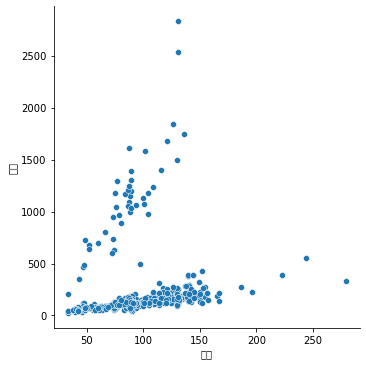

In [3]:
sns.relplot(x='面积', y='房价', data=df)

In [4]:
tezheng = [
        ['面积','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','房价'],
        ['面积','装修_毛坯', '装修_简装','装修_精装','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','装修_毛坯', '装修_简装','装修_精装','房价'],
        ['面积', '朝向_东', '朝向_北', '朝向_南', '朝向_西', '装修_毛坯', '装修_简装',
        '装修_精装', '板塔_塔楼', '板塔_板塔结合', '板塔_板楼', '房价'],
        ['面积', '楼层', '朝向_东', '朝向_北', '朝向_南', '朝向_西', '装修_毛坯', '装修_简装',
        '装修_精装', '板塔_塔楼', '板塔_板塔结合', '板塔_板楼', '房价'],
        ]

In [5]:
df = df[tezheng[4]]
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,0,0,1,0,0,0,1,0,0,1,130.0
1,131.03,0,0,1,0,0,0,1,0,1,0,255.0
2,128.21,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,0,0,1,0,0,0,1,0,1,0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,113.53,0,0,1,0,0,1,0,0,0,1,123.0
696,80.65,0,0,1,0,0,0,1,0,0,1,146.0
697,140.31,0,0,1,0,0,1,0,0,1,0,210.0
698,119.83,0,0,1,0,0,1,0,0,1,0,145.0


## 数据清洗

In [6]:
df = df[-(df['房价']>=250)]
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,0,0,1,0,0,0,1,0,0,1,130.0
2,128.21,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,0,0,1,0,0,0,1,0,1,0,126.0
6,139.95,0,0,1,0,0,0,1,0,0,1,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,113.53,0,0,1,0,0,1,0,0,0,1,123.0
696,80.65,0,0,1,0,0,0,1,0,0,1,146.0
697,140.31,0,0,1,0,0,1,0,0,1,0,210.0
698,119.83,0,0,1,0,0,1,0,0,1,0,145.0


In [7]:
df = df.dropna()
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,0,0,1,0,0,0,1,0,0,1,130.0
2,128.21,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,0,0,1,0,0,0,1,0,1,0,126.0
6,139.95,0,0,1,0,0,0,1,0,0,1,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,113.53,0,0,1,0,0,1,0,0,0,1,123.0
696,80.65,0,0,1,0,0,0,1,0,0,1,146.0
697,140.31,0,0,1,0,0,1,0,0,1,0,210.0
698,119.83,0,0,1,0,0,1,0,0,1,0,145.0


In [8]:
# 恢复划分数据后的索引
for i in [df]:
    i.index=range(i.shape[0])
df

,面积,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,0,0,1,0,0,0,1,0,0,1,130.0
1,128.21,0,0,1,0,0,0,1,0,0,1,165.0
2,87.74,0,0,1,0,0,1,0,0,0,1,136.0
3,90.65,0,0,1,0,0,0,1,0,1,0,126.0
4,139.95,0,0,1,0,0,0,1,0,0,1,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
626,113.53,0,0,1,0,0,1,0,0,0,1,123.0
627,80.65,0,0,1,0,0,0,1,0,0,1,146.0
628,140.31,0,0,1,0,0,1,0,0,1,0,210.0
629,119.83,0,0,1,0,0,1,0,0,1,0,145.0


E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\lib\site-pack

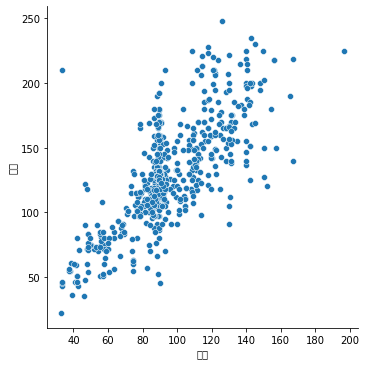

In [9]:
sns.relplot(x='面积', y='房价', data=df)

In [10]:
X = df.drop(columns = '房价')
y = df['房价']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   面积       631 non-null    float64
 1   朝向_东     631 non-null    int64  
 2   朝向_北     631 non-null    int64  
 3   朝向_南     631 non-null    int64  
 4   朝向_西     631 non-null    int64  
 5   装修_毛坯    631 non-null    int64  
 6   装修_简装    631 non-null    int64  
 7   装修_精装    631 non-null    int64  
 8   板塔_塔楼    631 non-null    int64  
 9   板塔_板塔结合  631 non-null    int64  
 10  板塔_板楼    631 non-null    int64  
 11  房价       631 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 59.3 KB


## 划分训练集和测试集

In [11]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(X , y , random_state=22)

In [12]:
# 恢复划分数据后的索引
for i in [x_train,x_test,y_train,y_test]:
    i.index=range(i.shape[0])
x_test
y_test

0      175.0
1      109.0
2      112.0
3      130.0
4      168.0
       ...  
153    142.0
154    170.0
155    170.0
156    150.0
157    129.0
Name: 房价, Length: 158, dtype: float64

## 训练模型

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [ ]:
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

## 模型评估

In [ ]:
forest_scores = cross_val_score(forest_reg,X,y,scoring = "neg_mean_squared_error",cv=10)

In [ ]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
forest_rmse_scores

array([38.95690257, 27.52771441, 28.01923237, 25.57562971, 28.95574491,
       29.52954193, 27.20914371, 42.5848504 , 26.26548073, 26.49243879])

In [ ]:
forest_rmse_scores.mean()

30.111667952495804

In [ ]:
# 得分
print("得分为:\n",forest_reg.score(x_test,y_test))
print("得分为:\n",forest_reg.score(x_train,y_train))

得分为:
 0.6626216799130333
得分为:
 0.9213700657024029


## 导出模型

In [ ]:
import joblib

In [ ]:
os.chdir("E:\\GitProjects\\Sklearn\\链家房价预估\\")

In [ ]:
joblib.dump(forest_reg, "GaoXin_ForestModel.model")

['ErQi_ForestModel.model']